In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score


In [2]:
games=pd.read_csv("AllLeagues.csv")
games=shuffle(games)

In [3]:
features=games.loc[:,"Wins":]


In [4]:
targets=games[["FTR"]]

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(features,targets,test_size=0.1)
#stratify=targets
X_train.shape,Y_train.shape

((35943, 32), (35943, 1))

In [6]:
d_tree=DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)
d_pred=d_tree.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

In [8]:
#classification_report_result = classification_report(Y_test, d_pred, average='macro')


In [9]:
print("Accuracy ",accuracy_score(Y_test,d_pred))
print("F1 Score ",f1_score(Y_test,d_pred,average="micro"))
print("Precision ",precision_score(Y_test,d_pred,average="micro"))
print("recall ",recall_score(Y_test,d_pred,average="micro"))

Accuracy  0.5933900851276915
F1 Score  0.5933900851276915
Precision  0.5933900851276915
recall  0.5933900851276915


In [10]:
cm=confusion_matrix(Y_test,d_pred,labels=["H", "D","A"])

In [11]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["H", "D","A"])

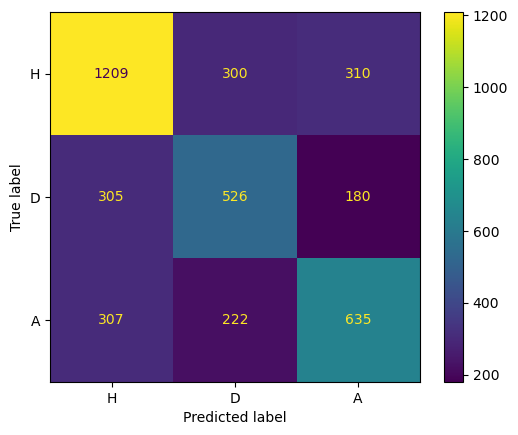

In [12]:
disp.plot()
plt.show()

In [13]:
d_tree.feature_importances_

array([0.02049966, 0.02337303, 0.02466474, 0.02391433, 0.02416369,
       0.02293152, 0.05644048, 0.06394734, 0.03809681, 0.03476445,
       0.01556544, 0.01496602, 0.01762294, 0.02682449, 0.02320931,
       0.02624336, 0.03413945, 0.02050603, 0.03996206, 0.03431079,
       0.03338865, 0.03143741, 0.03828243, 0.03978   , 0.03620663,
       0.03589471, 0.03289164, 0.03056755, 0.03485442, 0.03565654,
       0.03593086, 0.02896322])

In [14]:
fi=pd.Series(d_tree.feature_importances_,features.columns)

<AxesSubplot: >

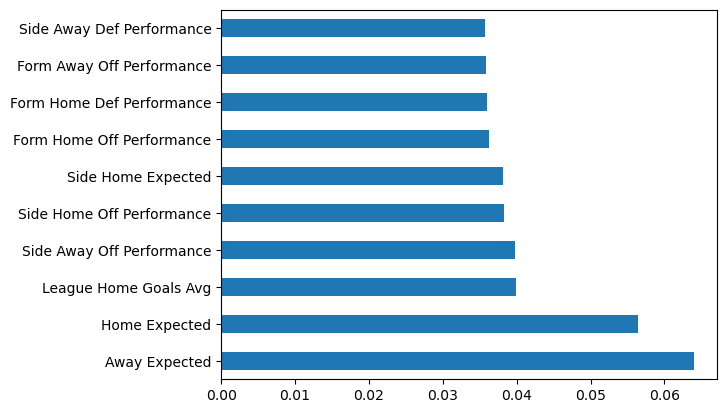

In [15]:
fi.nlargest(10).plot(kind="barh")

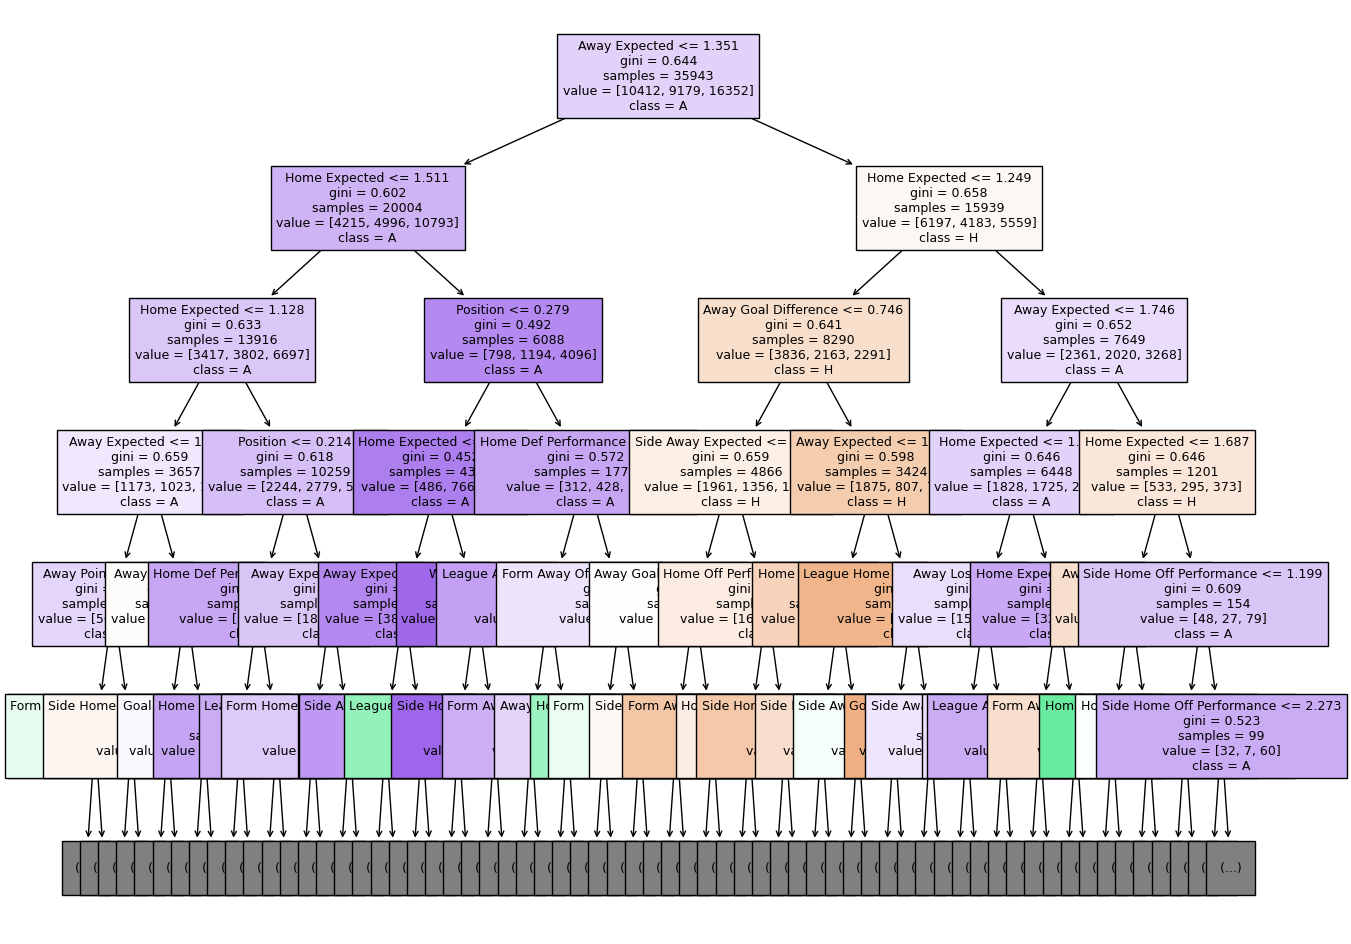

In [16]:
plt.figure(figsize=(15,12))
plot_tree(d_tree,max_depth=5,fontsize=9,feature_names=features.columns,class_names=["H","D","A"],filled=True)
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
#tree_params={"max_depth":[b for b in range(1,10)],"min_samples_leaf":[b for b in range(100,1000,100)]}
#scoring={"accuracy","f1","recall","precision"}
#scoring={"accuracy","f1_micro"}

In [19]:
#tuned_tree=DecisionTreeClassifier()

In [20]:
#clf=GridSearchCV(tuned_tree,tree_params,scoring=scoring,cv=5,refit="f1_micro")

In [21]:
#clf.fit(X_train,Y_train)

In [22]:
#clf.best_estimator_

In [23]:
#clf.best_score_